In [1]:
import tensorflow as tf 
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

C:\Users\sm\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [11]:
# Training data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [12]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")
# Constructing the linear model
pred = tf.add(tf.multiply(X,W), b)

In [15]:
#Mean squared error (cost function)
cost = tf.reduce_sum(tf.pow(pred-Y, 2)) / (2*n_samples)
#Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
#initialize the variables with their default values
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.089741655 W= 0.18676496 b= 1.253451
Epoch: 0100 cost= 0.088275187 W= 0.19050197 b= 1.2265674
Epoch: 0150 cost= 0.086977690 W= 0.19401652 b= 1.2012837
Epoch: 0200 cost= 0.085829854 W= 0.19732164 b= 1.1775073
Epoch: 0250 cost= 0.084814183 W= 0.20043017 b= 1.1551448
Epoch: 0300 cost= 0.083915420 W= 0.2033539 b= 1.1341114
Epoch: 0350 cost= 0.083120175 W= 0.20610376 b= 1.1143291
Epoch: 0400 cost= 0.082416415 W= 0.20869023 b= 1.0957226
Epoch: 0450 cost= 0.081793673 W= 0.21112272 b= 1.0782229
Epoch: 0500 cost= 0.081242613 W= 0.21341066 b= 1.061764
Epoch: 0550 cost= 0.080754943 W= 0.21556254 b= 1.0462835
Epoch: 0600 cost= 0.080323316 W= 0.21758673 b= 1.0317215
Epoch: 0650 cost= 0.079941347 W= 0.21949038 b= 1.018027
Epoch: 0700 cost= 0.079603344 W= 0.22128075 b= 1.0051466
Epoch: 0750 cost= 0.079304144 W= 0.22296484 b= 0.99303156
Epoch: 0800 cost= 0.079039335 W= 0.22454873 b= 0.9816374
Epoch: 0850 cost= 0.078804985 W= 0.22603841 b= 0.97092074
Epoch: 0900 cost= 0.078597546 W= 

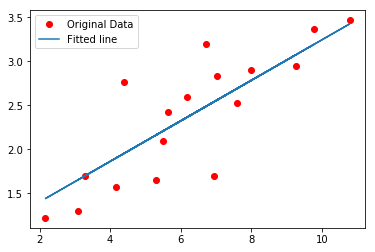

In [23]:
with tf.Session() as sess:
    sess.run(init)
    
    #Fit all the training data
    for epoch in range(training_epochs):
        for(x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        
        # Display logs for each epoch step
        # Dictionary must use curly braces
        if (epoch+1) % display_step ==0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
    print("optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training Cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
    #Grapghic display
    plt.plot(train_X, train_Y, 'ro', label='Original Data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()